In [1]:
%matplotlib inline

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers
from keras import Input
from keras import Model
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.version_utils import ModelVersionSelector
from keras import backend as K

# Generate a Dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
!ls "gdrive/MyDrive"

Mounted at /content/gdrive
 20230704_174950.jpg
 20sb0043.jpeg
 Aadhar.jpeg
 Acc.gsheet
 AnanyaPhoto.jpeg
 Archive.zip
 Ashish_1.png
 Ashish.gsheet
 CNN_assignment.zip
 cnnForMelnama_16_7_3_1_1melanoma_history.json
 cnnForMelnama_16_7_3_1_1melanoma_model.h5
 cnnForMelnama_16_7_5_3_11111melanoma_history.json
 cnnForMelnama_16_7_5_3_11111melanoma_model.h5
 cnnForMelnama_16_7_5_3_1melanoma_history.json
 cnnForMelnama_16_7_5_3_1melanoma_model.h5
 cnnForMelnama_16_7_7_1_1melanoma_history.json
 cnnForMelnama_16_7_7_1_1melanoma_model.h5
 cnnForMelnama_32_7_5_3_1_expmelanoma_history.json
 cnnForMelnama_32_7_5_3_1_expmelanoma_model.h5
 cnnForMelnama_32_7_5_3_1melanoma_history.json
 cnnForMelnama_32_7_5_3_1melanoma_model.h5
 cnnForMelnama_8_1_1_1_1melanoma_history.json
 cnnForMelnama_8_1_1_1_1melanoma_model.h5
 cnnForMelnama_8_5_5_5_5_1melanoma_history.json
 cnnForMelnama_8_5_5_5_5_1melanoma_model.h5
 cnnForMelnama_8_7_5_3_11_elumelanoma_history.json
 cnnForMelnama_8_7_5_3_11_elumelanoma_model.h

In [3]:
!unzip -n gdrive/MyDrive/CNN_assignment

Archive:  gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin ca

In [4]:
trainDataPath = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
testDataPath = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

# Understanding the data

In [5]:
batch_size = 32
img_width=180
img_height=180
image_size=(180,180)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=trainDataPath,
                                                               labels='inferred',
                                                               label_mode='int',
                                                               color_mode='rgb',
                                                               batch_size=batch_size,
                                                               image_size=image_size,#resizes the image
                                                               shuffle=True,
                                                               seed=42,
                                                               validation_split=0.2,
                                                               subset='training',
                                                               interpolation='bilinear',)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=trainDataPath,
                                                               labels='inferred',
                                                               label_mode='int',
                                                               color_mode='rgb',
                                                               batch_size=batch_size,
                                                               image_size=image_size,#resizes the image
                                                               shuffle=False,
                                                               seed=42,
                                                               validation_split=0.2,
                                                               subset='validation',
                                                               interpolation='bilinear',)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [6]:
class_names = train_ds.class_names
print(f'The classes are: {class_names}')

The classes are: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [7]:
pigmentedBenignKeratosis = list(trainDataPath.glob('pigmented benign keratosis/*'))
print('pigmented benign keratosis: '+str(len(pigmentedBenignKeratosis)))

melanoma = list(trainDataPath.glob('melanoma/*'))
print('melanoma: '+str(len(melanoma)))

basalCellCarcinoma = list(trainDataPath.glob('basal cell carcinoma/*'))
print('basal cell carcinoma: '+str(len(basalCellCarcinoma)))

nevus = list(trainDataPath.glob('nevus/*'))
print('nevus: '+str(len(nevus)))

squamousCellCarcinoma = list(trainDataPath.glob('squamous cell carcinoma/*'))
print('squamous cell carcinoma: '+str(len(squamousCellCarcinoma)))

vascularLesion = list(trainDataPath.glob('vascular lesion/*'))
print('vascular lesion: '+str(len(vascularLesion)))

actinicKeratosis = list(trainDataPath.glob('actinic keratosis/*'))
print('actinic Keratosis: '+str(len(actinicKeratosis)))

dermatofibroma = list(trainDataPath.glob('dermatofibroma/*'))
print('dermato Fibroma: '+str(len(dermatofibroma)))

seborrheicKeratosis = list(trainDataPath.glob('seborrheic keratosis/*'))
print('seborrheic keratosis: '+str(len(seborrheicKeratosis)))


pigmented benign keratosis: 462
melanoma: 438
basal cell carcinoma: 376
nevus: 357
squamous cell carcinoma: 181
vascular lesion: 139
actinic Keratosis: 114
dermato Fibroma: 95
seborrheic keratosis: 77


In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
import tensorflow as tf

class LRMetric(tf.keras.metrics.Metric):
    def __init__(self, name="learning_rate", **kwargs):
        super(LRMetric, self).__init__(name=name, **kwargs)
        self.lr = self.add_weight(name="lr", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        pass  # No need to update state for the learning rate

    def result(self):
        return self.lr

    def reset_state(self):
        tf.keras.backend.set_value(self.lr, 0.0)  # Reset the learning rate value

class LearningRateLogger(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        learning_rate = tf.keras.backend.get_value(self.model.optimizer.lr)
        print(f'Epoch {epoch + 1} - Learning rate: {learning_rate}')


In [10]:
import json
import re
from google.colab import files
import zipfile
from google.colab import drive

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
#When applying random flipping or any other data augmentation technique,
#it is important to specify the input shape so that the augmentation is applied appropriately.
#In particular, random flipping can be applied along either the horizontal or vertical axis of the image,
#depending on the problem and the orientation of the objects or features of interest in the image.
#By specifying the input shape, you can ensure that the random flipping is applied consistently across all images in your dataset,
#regardless of their original size or aspect ratio. Additionally, specifying the input shape can help avoid potential errors
#or unexpected behavior that could arise if the augmentation is applied incorrectly or inconsistently across different images.
        layers.RandomRotation(0.1),
        #layers.RandomRotation(0.2),
        #layers.RandomRotation(0.6),
        #layers.RandomRotation(0.85),
        #layers.RandomZoom(-.25, -.25),
        #layers.RandomZoom(.1, .1),
        #layers.RandomZoom(-.75, -.75),
        layers.RandomZoom(-.5, -.5),
        #layers.RandomZoom(.25, .25),
        #layers.RandomZoom(-.65, -.65),
        #layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
        #layers.RandomBrightness([-0.2,0.2]),
        #layers.RandomContrast(0.3),
    ]
)

class CNNForMelnama:
    img_height =180
    img_weight=180
    input_shape=(img_height, img_width, 3)
    imageDimensions = [180,180]
    learning_rate = 0.001
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    loss=tf.keras.losses.SparseCategoricalCrossentropy()
    #Since the last activation function in the model is a softmax activation,
    #the output of the model is already in the form of logits, i.e., unnormalized scores.
    #Therefore, not passing from_logits=True when using sparse_categorical_accuracy as the metric for the model,
    #as it assumes that the output is probabilities and applies a softmax activation internally.
    #Passing from_logits=True in this case would result in incorrect accuracy calculations.
    activation='relu'
    callbacks=[]
    filters = []
    batch_normalization=[]
    output_classes=9
    model={}

    def __init__(self, train_ds,val_ds):
        self.train_ds = train_ds
        self.val_ds = val_ds
        self.callbacks=[]
        self.metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]

    def custom_summary(self):
        custom_summary = []

        # Iterate over the layers in the model
        for layer in self.model.layers:
            # Add layer details to the custom summary
            layer_summary = layer.name + ' (' + layer.__class__.__name__ + ')'
            custom_summary.append(layer_summary)

            if (not isinstance(layer,tf.keras.layers.Flatten)) and (not isinstance(layer, keras.models.Sequential)) and (not isinstance(layer, tf.keras.layers.Rescaling)) and (not isinstance(layer, tf.keras.layers.Dropout)) and (not isinstance(layer, tf.keras.layers.BatchNormalization))and (not isinstance(layer, tf.keras.layers.Dropout)):
              if (layer.activation.__name__ != 'softmax'):
                print('activation name:'+layer.activation.__name__)

#            layer_activation = layer.get_config().get('activation')
#            if(layer_activation is None):
#              activation_name = 'relu'
#            else:
#              activation_name=tf.keras.activations.serialize(layer_activation)

#            custom_summary.append('  Activation: ' + activation_name)

            # Check if the layer is a Dropout layer
            if isinstance(layer, tf.keras.layers.Dropout):
                # Add dropout details to the custom summary
                dropout_rate = layer.rate
                dropout_summary = '  Dropout Rate: {:.2f}'.format(dropout_rate)
                custom_summary.append(dropout_summary)

        # Print the customized model summary
        print('\n'.join(custom_summary))

    def get_kernel_size(self,text):
      pattern = r"\((\d+), (\d+)\)"
      match = re.search(pattern, str(text))
      print(match)
      if match:
          return int(match.group(1))
      else: 3

    def getMoreLayers(self,withDataAugmentation):
        layers = [tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=self.input_shape)]
        if self.batch_normalization[0]:
          layers.append(tf.keras.layers.BatchNormalization())

        if(withDataAugmentation):
          layers.append(data_augmentation)
        else:
          print('No augmentation')

        if len(self.dropouts) > 0 and self.dropouts[0] > 0:
          layers.append(tf.keras.layers.Dropout(self.dropouts[0]))
        layers.append(tf.keras.layers.Conv2D(self.filters[0], self.kernels[0],strides=2,padding='same', input_shape=self.input_shape,activation=self.activation,kernel_regularizer=self.regularization))

        if self.batch_normalization[1]:
          layers.append(tf.keras.layers.BatchNormalization())
        if len(self.dropouts) > 1 and self.dropouts[1] > 0:
            layers.append(tf.keras.layers.Dropout(self.dropouts[1]))
        layers.append(tf.keras.layers.Conv2D(self.filters[1], self.kernels[1],strides=2,padding='same',activation=self.activation,kernel_regularizer=self.regularization))

        if self.batch_normalization[2]:
          layers.append(tf.keras.layers.BatchNormalization())
        if len(self.dropouts) > 2 and self.dropouts[2] > 0:
          layers.append(tf.keras.layers.Dropout(self.dropouts[2]))
        layers.append(tf.keras.layers.Conv2D(self.filters[2], self.kernels[2],strides=2,padding='same',activation=self.activation,kernel_regularizer=self.regularization))

        if self.batch_normalization[3]:
          layers.append(tf.keras.layers.BatchNormalization())
        if len(self.dropouts) > 3 and self.dropouts[3] > 0:
          layers.append(tf.keras.layers.Dropout(self.dropouts[3]))
        layers.append(tf.keras.layers.Conv2D(self.filters[3], self.kernels[3],strides=2,padding='same',activation=self.activation,kernel_regularizer=self.regularization))

        if self.batch_normalization[4]:
          layers.append(tf.keras.layers.BatchNormalization())
        if len(self.dropouts) > 4 and self.dropouts[4] > 0:
              layers.append(tf.keras.layers.Dropout(self.dropouts[4]))
        layers.append(tf.keras.layers.Conv2D(self.filters[4], self.kernels[4],strides=2,padding='same',activation=self.activation,kernel_regularizer=self.regularization))

        if len(self.dropouts) > 5 and self.dropouts[5] > 0:
          layers.append(tf.keras.layers.Dropout(self.dropouts[5]))
        layers.append(tf.keras.layers.Flatten())

        layers.append(tf.keras.layers.Dense(self.filters[6], activation=self.activation))
        if self.batch_normalization[6]:
          layers.append(tf.keras.layers.BatchNormalization())

        if len(self.dropouts) > 6 and self.dropouts[6] > 0:
          layers.append(tf.keras.layers.Dropout(self.dropouts[6]))
        layers.append(tf.keras.layers.Dense(self.output_classes,activation='softmax'))

        return layers

    def getLayers(self,withDataAugmentation):
        layers = [tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=self.input_shape)]
        if self.batch_normalization[0]:
          layers.append(tf.keras.layers.BatchNormalization())

        if(withDataAugmentation):
          layers.append(data_augmentation)
        else:
          print('No augmentation')

        if len(self.dropouts) > 0 and self.dropouts[0] > 0:
          layers.append(tf.keras.layers.Dropout(self.dropouts[0]))
        layers.append(tf.keras.layers.Conv2D(self.filters[0], self.kernels[0],strides=2,padding='same', input_shape=self.input_shape,activation=self.activation,kernel_regularizer=self.regularization))

        if self.batch_normalization[1]:
          layers.append(tf.keras.layers.BatchNormalization())

        if len(self.dropouts) > 1 and self.dropouts[1] > 0:
            layers.append(tf.keras.layers.Dropout(self.dropouts[1]))

        layers.append(tf.keras.layers.Conv2D(self.filters[1], self.kernels[1],strides=2,padding='same',activation=self.activation,kernel_regularizer=self.regularization))

        if self.batch_normalization[2]:
          layers.append(tf.keras.layers.BatchNormalization())

        if len(self.dropouts) > 2 and self.dropouts[2] > 0:
          layers.append(tf.keras.layers.Dropout(self.dropouts[2]))
        layers.append(tf.keras.layers.Conv2D(self.filters[2], self.kernels[2],strides=2,padding='same',activation=self.activation,kernel_regularizer=self.regularization))

        if self.batch_normalization[3]:
          layers.append(tf.keras.layers.BatchNormalization())

        if len(self.dropouts) > 3 and self.dropouts[3] > 0:
          layers.append(tf.keras.layers.Dropout(self.dropouts[3]))
        layers.append(tf.keras.layers.Flatten())

        layers.append(tf.keras.layers.Dense(self.filters[3], activation=self.activation))
        if self.batch_normalization[4]:
          layers.append(tf.keras.layers.BatchNormalization())

        if len(self.dropouts) > 4 and self.dropouts[4] > 0:
          layers.append(tf.keras.layers.Dropout(self.dropouts[4]))
        layers.append(tf.keras.layers.Dense(self.output_classes,activation='softmax'))

        return layers

    def create_model(self,filters,withDataAugmentation=True,kernels=[7,3,3],dropouts=[],activation='relu',batch_normalization=[False,False,False,False,False],regularization=None):
      self.filters = filters
      self.dropouts=dropouts
      self.kernels=kernels
      self.activation=activation
      self.batch_normalization=batch_normalization
      self.regularization=regularization
      if(len(self.filters)>5):
        self.model = Sequential(self.getMoreLayers(withDataAugmentation))
      else:
        self.model = Sequential(self.getLayers(withDataAugmentation))

      self.model.compile(optimizer=self.optimizer,loss=self.loss,metrics=self.metrics)
      self.printModelSummary()

    def get_lr_metric(self):
        def lr_metric(y_true, y_pred):
            if hasattr(self.optimizer, '_decayed_lr'):
                # Optimizer has the 'lr' attribute
                learning_rate = self.optimizer._decayed_lr(tf.float32)
            else:
                learning_rate = self.optimizer.lr

            if isinstance(learning_rate, tf.keras.optimizers.schedules.LearningRateSchedule):
                learning_rate_scalar = learning_rate(tf.constant(0))
            else:
                learning_rate_scalar = learning_rate

            learning_rate_tensor = tf.convert_to_tensor(learning_rate_scalar, dtype=tf.float32)

            return learning_rate_tensor

        lr_metric.__name__ = 'lr_metric'  # Set a name for the metric function

        return lr_metric

#    def get_lr_metric(self):
#      def lr(y_true, y_pred):
#        if hasattr(object, '_decayed_lr'):
#          return self.optimizer._decayed_lr(tf.float32) # I use ._decayed_lr method instead of .lr
#        else:
          # Object does not have the _decayed_lr attribute
#          return self.optimizer.lr
#      return lr

    def printModelSummary(self):
      print(self.model.optimizer.get_config())
      print(self.model.summary())
      print(self.custom_summary())

    def train_model(self,epochs=20):
      trained = self.model.fit(self.train_ds, epochs=epochs, validation_data=self.val_ds,callbacks=self.callbacks)

      self.history = trained.history
      plt.plot(self.history['sparse_categorical_accuracy'])
      plt.plot(self.history['val_sparse_categorical_accuracy'])
      plt.title('model accuracy')
      plt.ylabel('accuracy')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()

      plt.plot(self.history['loss'])
      plt.plot(self.history['val_loss'])
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'val'], loc='upper left')
      plt.show()

      return self.history

    def exponentialDecay(self,initial_learning_rate=0.0025, decay_steps=1000,decay_rate=0.25):
      lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps,decay_rate)
      self.optimizer =  tf.keras.optimizers.legacy.Adam(learning_rate=lr_schedule)

#      lr_metric = LRMetric()
#      if lr_metric not in self.metrics:
#          self.metrics.append(lr_metric)

      lr=self.get_lr_metric()
      if(lr not in self.metrics):
        self.metrics.append(lr)

    def decay_LR(self,callback):
      self.optimizer =  tf.keras.optimizers.legacy.Adam()
      print('reducing LR')
      self.callbacks.append(callback)
      lr=self.get_lr_metric()
      if(lr not in self.metrics):
        self.metrics.append(lr)

    def evaluate(self,test_data):
      return self.model.evaluate(test_data)

    def dataToSave(self):
      return self.model,self.history

    class Float32Encoder(json.JSONEncoder):
        def default(self, o):
            if isinstance(o, np.float32):
                return float(o)
            return super().default(o)

    def set_data(self,model,history):
      self.model=model
      self.history=history

    def save(self,prefix):
      print("mount")
      drive.mount('/content/drive',force_remount=True)

      print(self.model)
      print(self.history)
      self.model.save('/content/drive/MyDrive/' + prefix + 'melanoma_model.h5')

#      history_dict = self.history.copy()
      # Convert numpy arrays to lists for JSON serialization
#      for key, value in history_dict.items():
#          if isinstance(value, np.ndarray):
#              history_dict[key] = value.tolist()
#          elif isinstance(value, np.float32):
#              history_dict[key] = float(value)
      with open('/content/drive/MyDrive/' +prefix+'melanoma_history.json', 'w') as f:
            json.dump(self.history, f)

#      self.history.save('/content/drive/MyDrive/' +prefix+'melanoma_history.json')

    def upload_model(self):
      model_upload = files.upload()

      # Access the uploaded file
      for file_name, file_content in model_upload.items():
          self.model=file_content
          self.print_model_details()

    def upload_history(self):
      history_upload = files.upload()

      # Access the uploaded file
      for file_name, file_content in history_upload.items():
          self.history=file_content

    def print_model_details(self):
      self.dropouts = []
      self.kernels = []
      self.regularization = []

      for layer in self.model.layers:
          print(layer.name)
          if (isinstance(layer, tf.keras.layers.Conv2D)):
            self.filters.append(layer.filters)

          if ((isinstance(layer, tf.keras.layers.Dense)) and (layer.activation.__name__ != 'softmax')):
            self.filters.append(layer.units)
          else:
            print(layer.get_config())

          # Extract dropouts
          if isinstance(layer, tf.keras.layers.Dropout):
              dropout_rate = layer.rate
              self.dropouts.append(dropout_rate)

          if isinstance(layer, tf.keras.layers.Conv2D):
          # Extract kernels (assuming the layer is a convolutional layer)
            print("Extracting kernel size "+str(layer.kernel_size))
            num_kernels = self.get_kernel_size(str(layer.kernel_size))
            self.kernels.append(num_kernels)

          print(layer.get_config())
          # Extract activation functions
          if (not isinstance(layer,tf.keras.layers.Flatten)) and (not isinstance(layer, keras.models.Sequential)) and (not isinstance(layer, tf.keras.layers.Rescaling)) and (not isinstance(layer, tf.keras.layers.Dropout)) and (not isinstance(layer, tf.keras.layers.BatchNormalization))and (not isinstance(layer, tf.keras.layers.Dropout)):
            if (layer.activation.__name__ != 'softmax'):
              self.activation = layer.activation.__name__
          # Extract batch normalization parameters
          self.batch_normalization.append(isinstance(layer, tf.keras.layers.BatchNormalization))
            #epsilon = layer.get_config()['epsilon']
            #momentum = layer.get_config()['momentum']

          # Extract regularization settings (assuming l2 regularization)

          l1_reg = layer.get_config().get('kernel_regularizer')
          if l1_reg:
              regularization_strength = l1_reg.get('l1')
              self.regularization.append(keras.regularizers.l1(regularization_strength))

          self.optimizer = self.model.optimizer

          # Print or use the extracted values as needed
          print("Filters:", self.filters)
          print("Dropouts:", self.dropouts)
          print("Kernels:", self.kernels)
          print("Activations:", self.activation)
          print("Batch Normalization:", self.batch_normalization)
          print("Regularization:", self.regularization)
          print("optimiaer ",self.optimizer)

    def load(self, prefix):
        if not prefix:
            return
        drive.mount('/content/drive',force_remount=True)
        !ls "/content/drive"

        model_file_path = '/content/drive/MyDrive/' + prefix + 'melanoma_model.h5'
        history_file_path = '/content/drive/MyDrive/' + prefix + 'melanoma_history.json'
        print("Model file path:", model_file_path)
        print("History file path:", history_file_path)
        # Load the trained model
        self.model = tf.keras.models.load_model(model_file_path)
        self.print_model_details()

        # Load the training history
        with open(history_file_path, 'r') as f:
            self.history = json.load(f)

# Visualizing data

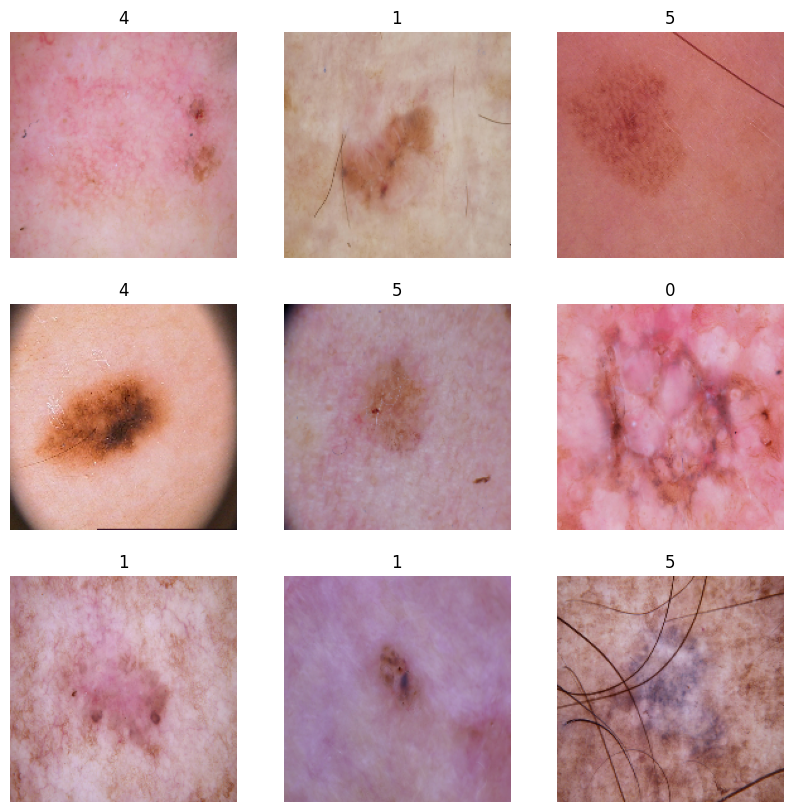

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# Data preprocessing

Our image are already in size (180x180). However, their RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer at the start of our model.

In general, it's better to scale the data before performing data augmentation. Scaling involves normalizing the input data to have zero mean and unit variance, which helps the model learn more efficiently and prevents any one feature from dominating the others. On the other hand, data augmentation involves applying random transformations to the input data to increase its diversity and reduce overfitting.

Performing scaling before data augmentation ensures that the same scaling factor is applied to all the augmented samples. This means that the scale of the augmented data is consistent with the original data, which helps the model learn better.

If data augmentation is performed before scaling, the scaling factor is applied to the original data and the augmented data separately, which can cause inconsistencies in the scale of the data. This can lead to issues such as poor convergence and slow training.

Therefore, it's generally recommended to apply scaling before data augmentation in machine learning pipelines. However, the order may depend on the specific use case and the type of data augmentation being performed. For example, if the data augmentation involves adding noise to the data, it may be better to apply scaling after the noise is added. In general, it's important to experiment with different data preprocessing pipelines to determine the optimal order for a given task.

# Data Preprocessing

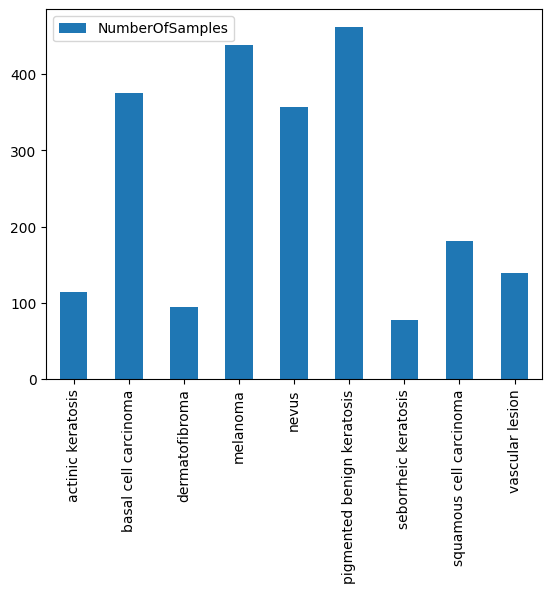

In [12]:
class_size = {}

for name in class_names:
    class_size[name] = len(list(trainDataPath.glob(name+'/*.jpg')))

class_size

class_df = pd.DataFrame(class_size.items(),index=list(class_size), columns = ['ClassName', 'NumberOfSamples'])
class_df.drop(['ClassName'], axis = 1, inplace=True)
class_df
class_df.plot.bar()
plt.show()

* Imbalanced Class Distribution: The class distribution is not uniform, with some classes having significantly fewer samples than others. Imbalanced classes can lead to biases in the model's predictions, where it tends to favor the majority classes. Augmentation can help balance the class distribution and prevent the model from being overly biased toward the majority classes.

* Data Scarcity: Classes with a low number of samples, such as "dermato Fibroma" and "seborrheic keratosis," might not have enough data to train a robust model effectively. Data augmentation can artificially increase the size of these classes, allowing the model to learn more representative features from these classes.

Given the imbalanced class distribution and the potential benefits listed above, data augmentation is likely to be valuable in this context. It's a good practice to artificially introduce sample diversity by applying random yet realistic transformations to the training images, such as random horizontal flipping or small random rotations. This helps expose the model to different aspects of the training data while slowing down overfitting.

# Rectify the imbalance

In [13]:
!pip install Augmentor

In [14]:
import Augmentor
trainDataPathResolved=trainDataPath.resolve()
num_images_per_class = {}
for i in class_names:
    p = Augmentor.Pipeline(str(trainDataPathResolved) +"/" +i)
    p.rotate(probability=0.3, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000) ## We are adding 1000 samples per class to make sure that none of the classes are sparse.
    num_images_per_class[i]=(len(p.augmentor_images))

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F26001C2620>: 100%|██████████| 1000/1000 [00:20<00:00, 48.04 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F25CB93A020>: 100%|██████████| 1000/1000 [00:21<00:00, 46.49 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F26001B52D0>: 100%|██████████| 1000/1000 [00:21<00:00, 47.22 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=722x545 at 0x7F25CB9690F0>: 100%|██████████| 1000/1000 [01:25<00:00, 11.64 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7F25CB951420>: 100%|██████████| 1000/1000 [01:27<00:00, 11.40 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F260012F2B0>: 100%|██████████| 1000/1000 [00:23<00:00, 42.67 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F26001A0C10>: 100%|██████████| 1000/1000 [00:46<00:00, 21.29 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F25CB94D3F0>: 100%|██████████| 1000/1000 [00:23<00:00, 42.46 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F25CB95AFE0>: 100%|██████████| 1000/1000 [00:21<00:00, 46.75 Samples/s]


In [15]:
image_count_train = len(list(trainDataPath.glob('*/output/*.jpg')))
print(image_count_train)

9000


In [16]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  trainDataPath,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  trainDataPath,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.
Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


{'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': True, 'is_legacy_optimizer': False, 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 16)        2368      
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 32)        12832     
                                                                 
 

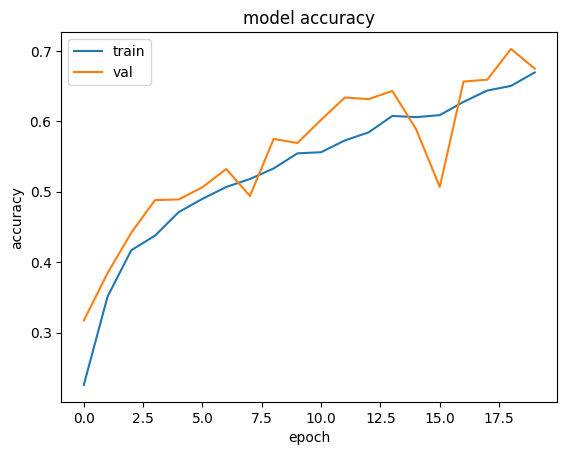

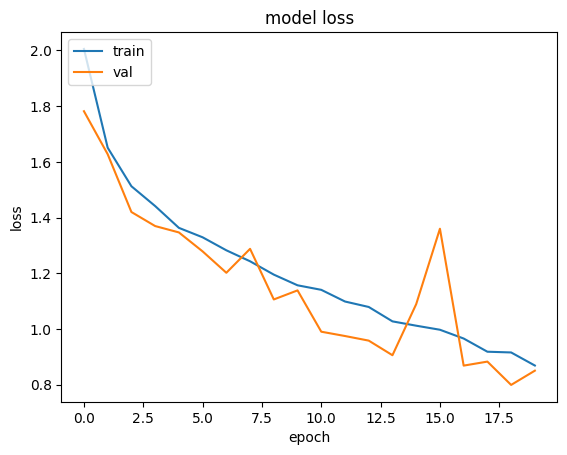

{'loss': [2.0056324005126953,
  1.650907278060913,
  1.5124520063400269,
  1.441343903541565,
  1.3630441427230835,
  1.3290959596633911,
  1.2824090719223022,
  1.242982029914856,
  1.1950784921646118,
  1.1567301750183105,
  1.1404505968093872,
  1.0984926223754883,
  1.0788817405700684,
  1.027193546295166,
  1.0116541385650635,
  0.9971126914024353,
  0.965570330619812,
  0.9181914925575256,
  0.9155471324920654,
  0.8685809373855591],
 'sparse_categorical_accuracy': [0.22586743533611298,
  0.35120105743408203,
  0.41703736782073975,
  0.43772241473197937,
  0.47119662165641785,
  0.48999109864234924,
  0.5067837834358215,
  0.5181272029876709,
  0.5331405401229858,
  0.5544928908348083,
  0.5561610460281372,
  0.572842538356781,
  0.5842971801757812,
  0.6076512336730957,
  0.6058719158172607,
  0.6087633371353149,
  0.6275578141212463,
  0.6436832547187805,
  0.6502446532249451,
  0.6693727970123291],
 'val_loss': [1.7818775177001953,
  1.627480387687683,
  1.4199063777923584,
  

In [21]:
# Evaluate the model
cnnForMelnama_no_opt=CNNForMelnama(train_ds,val_ds)
cnnForMelnama_no_opt.create_model([16,32,64,128,256],kernels=[7,5,3,1],activation='relu',dropouts=[0,0,0,0,0],batch_normalization=[False,False,False,False,False,False,False])
cnnForMelnama_no_opt.train_model()

The loss and accuracy curves can be smoother and the performance of the model can be improved.

{'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_40 (Bat  (None, 180, 180, 3)      12        
 chNormalization)                                                
                                                                 
 sequential_12 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 90, 90, 64)        9472      
                                                                 
 batch_normalization_41 (Bat  (None, 90, 90, 64)       256       
 chNormalization)                                             

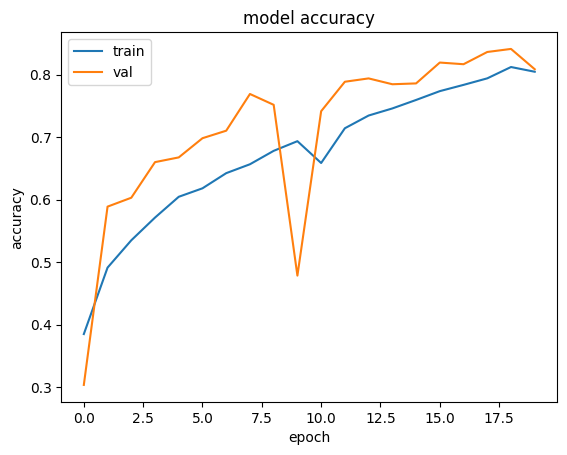

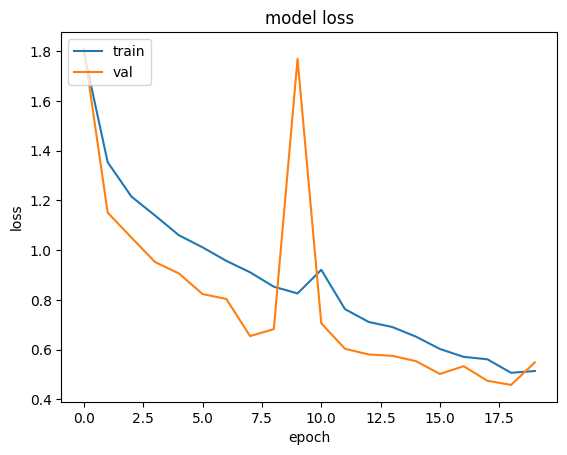

{'loss': [1.7939554452896118,
  1.3535406589508057,
  1.2151871919631958,
  1.1387784481048584,
  1.0597941875457764,
  1.0110559463500977,
  0.9567337036132812,
  0.9107940196990967,
  0.852911651134491,
  0.8258324265480042,
  0.9207319617271423,
  0.7625532746315002,
  0.7111028432846069,
  0.6905699968338013,
  0.6515986323356628,
  0.6025445461273193,
  0.5708181858062744,
  0.5609970092773438,
  0.5066787004470825,
  0.5139157176017761],
 'sparse_categorical_accuracy': [0.3848976790904999,
  0.49121442437171936,
  0.5349199175834656,
  0.571285605430603,
  0.6045373678207397,
  0.6181049942970276,
  0.6423487663269043,
  0.6565836071968079,
  0.6780471801757812,
  0.6935053467750549,
  0.6585854291915894,
  0.7141903638839722,
  0.7345418334007263,
  0.7458852529525757,
  0.7594528198242188,
  0.7735764980316162,
  0.7835854291915894,
  0.7940391302108765,
  0.8121663928031921,
  0.8046041131019592],
 'val_loss': [1.808868646621704,
  1.1503771543502808,
  1.0505998134613037,
  0

In [38]:
cnnForMelnama_64_7_5_3_1_exp=CNNForMelnama(train_ds,val_ds)
cnnForMelnama_64_7_5_3_1_exp.create_model([64,128,256,512,1024],kernels=[7,5,3,1],activation='relu',dropouts=[0,0,0,0,0],batch_normalization=[True,True,True,True,True,True,True])
cnnForMelnama_64_7_5_3_1_exp.train_model()

The loss has decresed considerably, however the loss and accuracy curves can be smoother.

{'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_45 (Bat  (None, 180, 180, 3)      12        
 chNormalization)                                                
                                                                 
 sequential_12 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 dropout_29 (Dropout)        (None, 180, 180, 3)       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 90, 90, 32)        4736      
                                                              

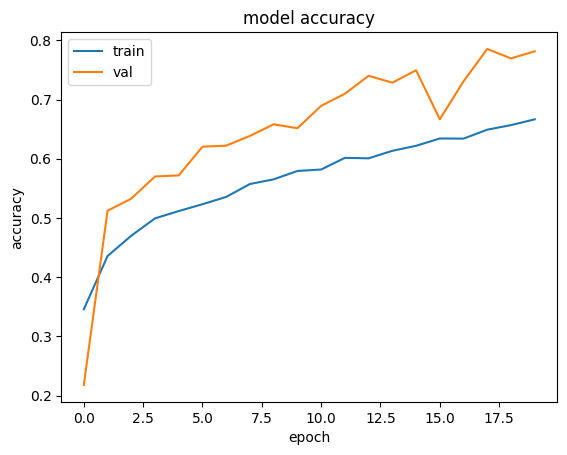

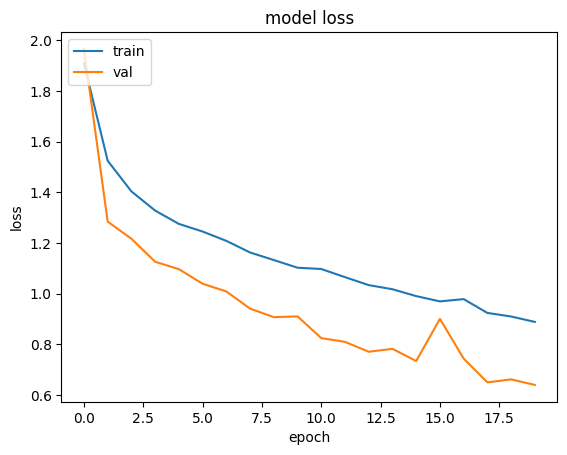

{'loss': [1.909793734550476,
  1.5243327617645264,
  1.4031709432601929,
  1.3274879455566406,
  1.2749220132827759,
  1.244720697402954,
  1.207849383354187,
  1.1620491743087769,
  1.1321494579315186,
  1.1018975973129272,
  1.096778154373169,
  1.064597725868225,
  1.0331823825836182,
  1.0168858766555786,
  0.9897025227546692,
  0.9689221382141113,
  0.9778721332550049,
  0.9233196377754211,
  0.9092148542404175,
  0.8877800703048706],
 'sparse_categorical_accuracy': [0.3458629846572876,
  0.43572065234184265,
  0.4700845181941986,
  0.4993327260017395,
  0.5116770267486572,
  0.5232428908348083,
  0.5355871915817261,
  0.5573843121528625,
  0.5652802586555481,
  0.5794039368629456,
  0.581850528717041,
  0.6015347242355347,
  0.6007562279701233,
  0.6134341359138489,
  0.621886134147644,
  0.6342304348945618,
  0.63400799036026,
  0.6491325497627258,
  0.6568060517311096,
  0.666592538356781],
 'val_loss': [1.9659005403518677,
  1.2840081453323364,
  1.216307282447815,
  1.1253566

In [39]:
cnnForMelnama_32_7_5_3_1_exp=CNNForMelnama(train_ds,val_ds)
cnnForMelnama_32_7_5_3_1_exp.create_model([32,64,128,256,512],kernels=[7,5,3,1],activation='relu',dropouts=[0.1,0.2,0.3,0.4,0.5],batch_normalization=[True,True,True,True,True,True,True])
cnnForMelnama_32_7_5_3_1_exp.train_model()

Have to try something different

{'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_50 (Bat  (None, 180, 180, 3)      12        
 chNormalization)                                                
                                                                 
 sequential_12 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 dropout_34 (Dropout)        (None, 180, 180, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 90, 90, 16)        2368      
                                                              

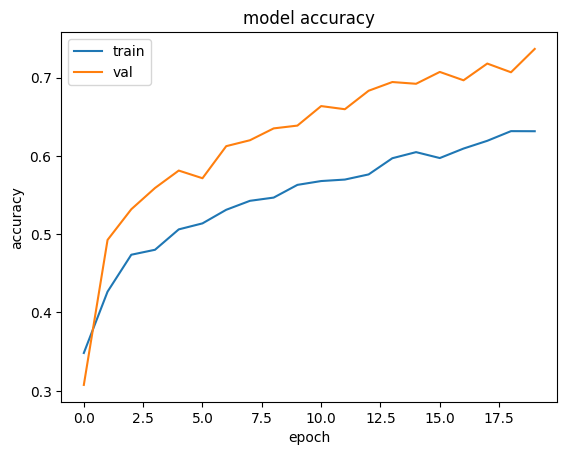

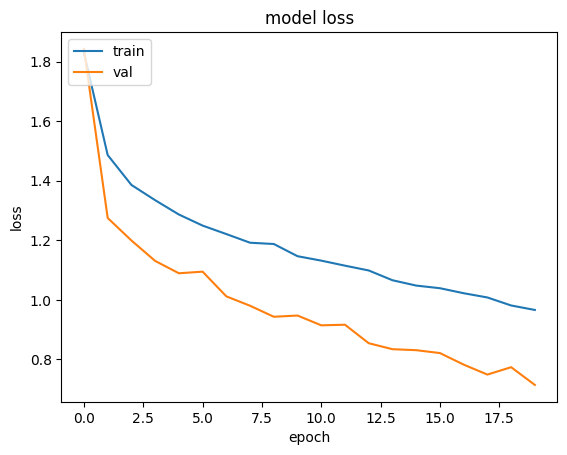

{'loss': [1.8301193714141846,
  1.4860827922821045,
  1.385771632194519,
  1.3345059156417847,
  1.2864161729812622,
  1.249220848083496,
  1.2207696437835693,
  1.1916826963424683,
  1.1874089241027832,
  1.1464098691940308,
  1.1315463781356812,
  1.114634394645691,
  1.0985027551651,
  1.0657029151916504,
  1.047768473625183,
  1.0389471054077148,
  1.0221359729766846,
  1.0078538656234741,
  0.9809901714324951,
  0.9659155607223511],
 'sparse_categorical_accuracy': [0.34830960631370544,
  0.4266014099121094,
  0.4737544357776642,
  0.48009341955184937,
  0.5061165690422058,
  0.5137900114059448,
  0.5311387777328491,
  0.5425934195518494,
  0.5467081665992737,
  0.5629448294639587,
  0.5678380727767944,
  0.569728672504425,
  0.5762900114059448,
  0.5969750881195068,
  0.6047598123550415,
  0.5971975326538086,
  0.6093193888664246,
  0.6192170977592468,
  0.6315613985061646,
  0.6314501762390137],
 'val_loss': [1.8424872159957886,
  1.2748165130615234,
  1.199233055114746,
  1.1305

In [40]:
cnnForMelnama_dropout=CNNForMelnama(train_ds,val_ds)
cnnForMelnama_dropout.create_model([16,32,64,128,256],kernels=[7,5,3,1],activation='relu',dropouts=[0.1,0.2,0.3,0.4,0.5],batch_normalization=[True,True,True,True,True,True,True])
cnnForMelnama_dropout.train_model()

The curve has improved significantly. However there is a gap between the train and validation results. Trying to minimise that by reducing dropouts.

{'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_22 (Bat  (None, 180, 180, 3)      12        
 chNormalization)                                                
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 90, 90, 16)        2368      
                                                                 
 batch_normalization_23 (Bat  (None, 90, 90, 16)       64        
 chNormalization)                                             

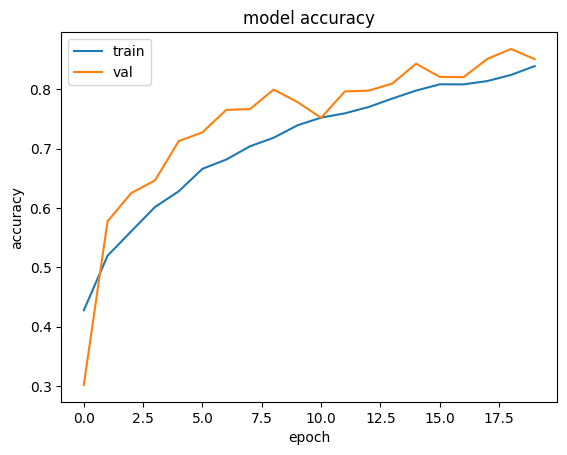

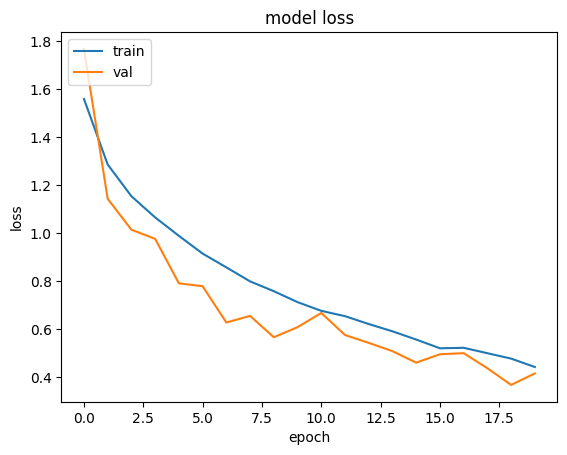

{'loss': [1.558184027671814,
  1.2855302095413208,
  1.1534558534622192,
  1.0653294324874878,
  0.9886313080787659,
  0.9148529171943665,
  0.8575791120529175,
  0.7991692423820496,
  0.7583651542663574,
  0.7128962874412537,
  0.6766529083251953,
  0.6544840931892395,
  0.6217544674873352,
  0.5914273262023926,
  0.5571906566619873,
  0.5208939909934998,
  0.5228356719017029,
  0.5003376007080078,
  0.47789615392684937,
  0.44287797808647156],
 'sparse_categorical_accuracy': [0.4276023209095001,
  0.5195729732513428,
  0.5608318448066711,
  0.6017571091651917,
  0.6282250881195068,
  0.6661477088928223,
  0.6817170977592468,
  0.7040702700614929,
  0.7185275554656982,
  0.739435076713562,
  0.7524465918540955,
  0.7596752643585205,
  0.7703514099121094,
  0.7845863103866577,
  0.7980427145957947,
  0.8086076378822327,
  0.8084964156150818,
  0.814056932926178,
  0.824399471282959,
  0.839301586151123],
 'val_loss': [1.7663267850875854,
  1.142845630645752,
  1.0142381191253662,
  0.9

In [33]:
cnnForMelnama_batch=CNNForMelnama(train_ds,val_ds)
cnnForMelnama_batch.create_model([16,32,64,128,256],kernels=[7,5,3,1],activation='relu',dropouts=[0,0,0,0,0],batch_normalization=[True,True,True,True,True,True,True])
cnnForMelnama_batch.train_model()

{'name': 'Adam', 'learning_rate': {'class_name': 'ExponentialDecay', 'config': {'initial_learning_rate': 0.015, 'decay_steps': 2000, 'decay_rate': 0.5, 'staircase': False, 'name': None}}, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_23 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_95 (Bat  (None, 180, 180, 3)      12        
 chNormalization)                                                
                                                                 
 sequential_12 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 conv2d_69 (Conv2D)          (None, 90, 90, 8)         1184      
                                               

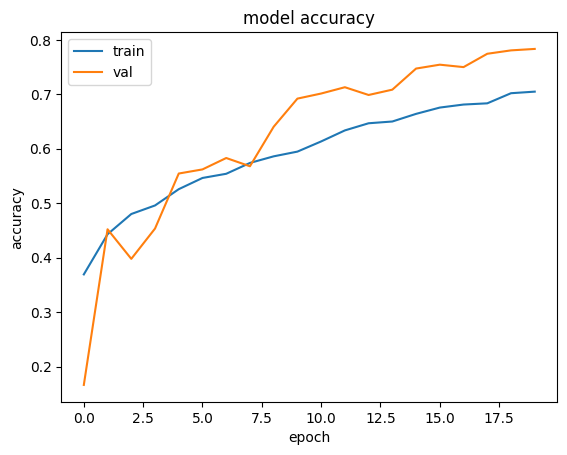

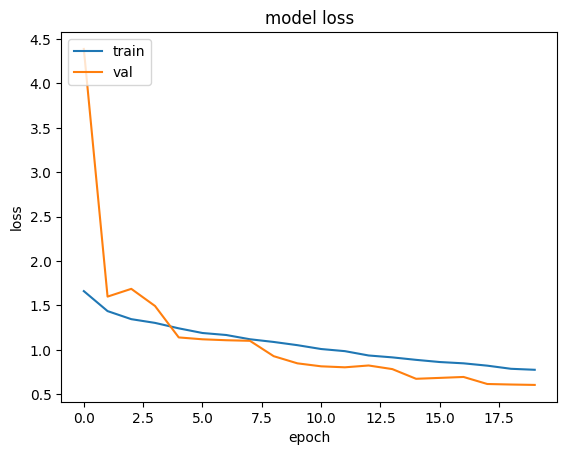

{'loss': [1.6609625816345215,
  1.4360195398330688,
  1.3451218605041504,
  1.3031182289123535,
  1.2417075634002686,
  1.1891957521438599,
  1.1667344570159912,
  1.1187721490859985,
  1.0883857011795044,
  1.052154779434204,
  1.0087395906448364,
  0.9848580956459045,
  0.9360248446464539,
  0.9146581888198853,
  0.8867738842964172,
  0.8622089624404907,
  0.847594141960144,
  0.821405291557312,
  0.7860543131828308,
  0.7749330401420593],
 'sparse_categorical_accuracy': [0.3693282902240753,
  0.4430604875087738,
  0.48020461201667786,
  0.4958852231502533,
  0.5258007049560547,
  0.5463745594024658,
  0.5540480613708496,
  0.5739546418190002,
  0.5860764980316162,
  0.5947508811950684,
  0.6134341359138489,
  0.6336743831634521,
  0.6467971801757812,
  0.6500222682952881,
  0.6640347242355347,
  0.675600528717041,
  0.6811610460281372,
  0.6833852529525757,
  0.7019572854042053,
  0.7048487663269043],
 'lr_metric': [0.014290262944996357,
  0.012964200228452682,
  0.01176117919385433

In [49]:
# Without the dropouts in this model, the loss variation was high
cnnForMelnama_8_7_5_3_1_exp=CNNForMelnama(train_ds,val_ds)
cnnForMelnama_8_7_5_3_1_exp.exponentialDecay(initial_learning_rate=0.015, decay_steps=2000,decay_rate=0.5)
cnnForMelnama_8_7_5_3_1_exp.create_model([8,16,32,64,128],kernels=[7,5,3,1],activation='relu',dropouts=[0,0,0,0,0.1],batch_normalization=[True,True,True,True,True,True,True])
cnnForMelnama_8_7_5_3_1_exp.train_model()

Comaparing the models

|Model Name|Optimization|Final Epoch Details|Comments|
|----------|-----------|------|----------|
|cnnForMelnama_no_opt|No dropout, no batch normalization|loss: 0.8686 - sparse_categorical_accuracy: 0.6694 - val_loss: 0.8501 - val_sparse_categorical_accuracy: 0.6747|The loss and accuracy curves are varying significantly|
|cnnForMelnama_64_7_5_3_1_exp|Dropout and batch normalization|loss: 0.5139 - sparse_categorical_accuracy: 0.8046 - val_loss: 0.5487 - val_sparse_categorical_accuracy: 0.8086|The loss value has significantly lowered and the performance has improved however the curves are still varying significantly|
|cnnForMelnama_32_7_5_3_1_exp|Dropout and batch normalization|loss: 0.8878 - sparse_categorical_accuracy: 0.6666 - val_loss: 0.6390 - val_sparse_categorical_accuracy: 0.7815|The loss and accuracy curves are varying but better than before|
|cnnForMelnama_dropout|Dropout and batch normalization|loss: 0.9659 - sparse_categorical_accuracy: 0.6315 - val_loss: 0.7142 - val_sparse_categorical_accuracy: 0.7365|The curves are more stable than before but the gap between training results and validation results is more|
|cnnForMelnama_8_7_5_3_1_exp|dropout and batch normalization|loss: 0.7749 - sparse_categorical_accuracy: 0.7048 - lr_metric: 0.0022 - val_loss: 0.6044|average curve variations are present|
|cnnForMelnama_batch|Batch normalization|loss: 0.5684 - sparse_categorical_accuracy: 0.7915 - val_loss: 0.5058 - val_sparse_categorical_accuracy: 0.8189|The loss value has significantly lowered and the performance has improved and the curves are stable|


Choosing cnnForMelnama_batch

In [34]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=testDataPath,
                                                               labels='inferred',
                                                               label_mode='int',
                                                               color_mode='rgb',
                                                               batch_size=batch_size,
                                                               image_size=image_size,
                                                               shuffle=True,
                                                               seed=42,)

print(cnnForMelnama_batch.evaluate(test_ds))


Found 118 files belonging to 9 classes.
4/4 [==============================] - 5s 63ms/step - loss: 3.1865 - sparse_categorical_accuracy: 0.4322
[3.1865181922912598, 0.43220338225364685]
